# Matrix Multiplication Analysis


Matrix multiplication is essential in linear algebra, with applications in fields like computer graphics, quantum mechanics, and machine learning. This notebook explores two key algorithms: the naive method and Strassen's algorithm, focusing on their time complexities, memory requirements, and practical considerations.

The naive method, simple to implement, has a time complexity of $O(n³)$ for n×n matrices. Strassen's algorithm improves this to $O(n^{2.807})$, offering better performance for large matrices. However, the choice between these methods depends on factors like matrix size, memory, precision needs, and hardware.

In this notebook, we will:

- Implement and analyze the naive method
- Explore Strassen's algorithm
- Compare memory requirements
- Discuss practical considerations
- Consider a MapReduce approach for large-scale matrix multiplication

By the end, you'll understand these algorithms' strengths and weaknesses and know when to use each.

In [ ]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from memory_profiler import memory_usage


## 1. Naive Matrix Multiplication <a name="naive"></a>

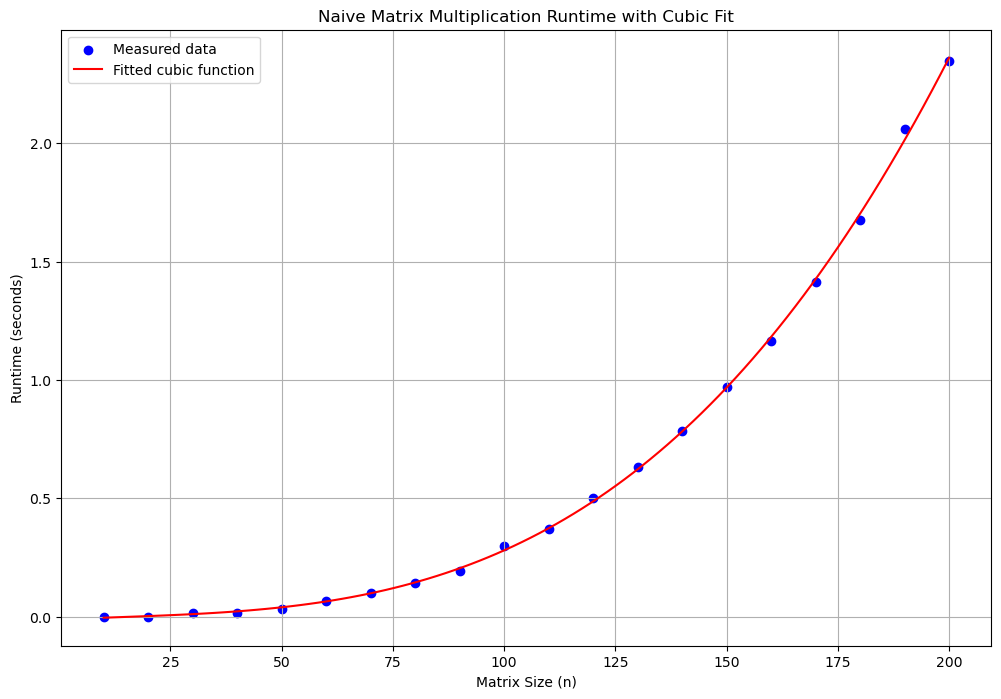

Fitted cubic function: 3.445320e-07 * x^3 + -1.392023e-05 * x^2 + 8.692619e-04 * x + -1.226442e-02
95% Confidence Intervals:
a: 3.445320e-07 ± 4.780793e-08
b: -1.392023e-05 ± 1.524905e-05
c: 8.692619e-04 ± 1.395825e-03
d: -1.226442e-02 ± 3.469068e-02
R-squared: 0.999591
Root Mean Squared Error (RMSE): 0.014493
Mean Absolute Error (MAE): 0.009828

2. Average prediction error:
   RMSE: 0.014493 seconds
   MAE: 0.009828 seconds
   These values represent the average deviation between the predicted and actual runtimes.

3. Coefficient analysis:
   The dominant term is ax^3 with a = 3.445320e-07
   This confirms the O(n^3) time complexity of the naive matrix multiplication algorithm.


In [8]:
def naive_matrix_multiply(A, B):
    """Perform matrix multiplication using the naive method."""
    # Get the dimensions of the input matrices
    n = A.shape[0]
    C = np.zeros((n, n))
    # 3 nested loops to iterate over rows and columns of the output matrix
    for i in range(n):
        for j in range(n):
            for k in range(n):
                # Multiply the corresponding elements of A and B and add to the result
                C[i, j] += A[i, k] * B[k, j]
    return C

def measure_naive_runtime(n):
    """Measure the runtime of naive matrix multiplication for n x n matrices."""
    # Generate random matrices
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    # Measure the runtime
    start_time = time.time()
    naive_matrix_multiply(A, B)
    end_time = time.time()
    return end_time - start_time

def cubic_func(x, a, b, c, d):
    """Define the cubic function to fit to the data."""
    return a * x**3 + b * x**2 + c * x + d

def run_test():
    """Test the performance of the naive matrix multiplication algorithm and analyze results."""
    # Measure runtimes for different matrix sizes
    # Create a list of matrix sizes from 10 to 200 in steps of 10
    sizes = np.array(range(10, 201, 10))
    # Measure the runtime for each matrix size
    naive_runtimes = [measure_naive_runtime(n) for n in sizes]

    # Fit the cubic function to the data
    popt, pcov = curve_fit(cubic_func, sizes, naive_runtimes)
    # Get the coefficients of the fitted function for each coefficient a, b, c, d of the cubic function
    a, b, c, d = popt

    # Generate points for the fitted curve
    # Generate a range of matrix sizes for the fitted curve
    x_fit = np.linspace(sizes.min(), sizes.max(), 100)
    y_fit = cubic_func(x_fit, *popt)

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.scatter(sizes, naive_runtimes, color='blue', label='Measured data')
    plt.plot(x_fit, y_fit, 'r-', label='Fitted cubic function')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.title('Naive Matrix Multiplication Runtime with Cubic Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate various statistics
    y_pred = cubic_func(sizes, *popt)
    r_squared = r2_score(naive_runtimes, y_pred)
    rmse = np.sqrt(mean_squared_error(naive_runtimes, y_pred))
    mae = mean_absolute_error(naive_runtimes, y_pred)

    # Calculate confidence intervals
    perr = np.sqrt(np.diag(pcov))

    # Print the results
    print(f"Fitted cubic function: {a:.6e} * x^3 + {b:.6e} * x^2 + {c:.6e} * x + {d:.6e}")
    print(f"95% Confidence Intervals:")
    print(f"a: {a:.6e} ± {1.96 * perr[0]:.6e}")
    print(f"b: {b:.6e} ± {1.96 * perr[1]:.6e}")
    print(f"c: {c:.6e} ± {1.96 * perr[2]:.6e}")
    print(f"d: {d:.6e} ± {1.96 * perr[3]:.6e}")
    print(f"R-squared: {r_squared:.6f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")

    return r_squared, rmse, mae, popt, pcov

r_squared, rmse, mae, popt, pcov = run_test()


print(f"\n2. Average prediction error:")
print(f"   RMSE: {rmse:.6f} seconds")
print(f"   MAE: {mae:.6f} seconds")
print("   These values represent the average deviation between the predicted and actual runtimes.")

print("\n3. Coefficient analysis:")
a, b, c, d = popt
print(f"   The dominant term is ax^3 with a = {a:.6e}")
print(f"   This confirms the O(n^3) time complexity of the naive matrix multiplication algorithm.")

### 1. Theoretical Foundation

The naive method of matrix multiplication has O(n³) time complexity due to its algorithmic structure:

1. **Triple Nested Loop**: The algorithm employs three nested loops, each iterating n times for n×n matrices.

2. **Loop Structure Breakdown**:
   - Outer loop: Iterates over rows of the first matrix (n iterations)
   - Middle loop: Iterates over columns of the second matrix (n iterations)
   - Inner loop: Computes the dot product of a row from the first matrix and a column from the second matrix (n iterations)

3. **Core Operation**: Within the innermost loop, we perform a multiplication and an addition:
   ```python
   C[i][j] += A[i][k] * B[k][j]
   ```
   This operation has a constant time complexity O(1).

4. **Total Operations**: The number of basic operations is:
   n (outer loop) × n (middle loop) × n (inner loop) × O(1) (core operation) = O(n³)

This structure results in the total number of operations scaling cubically with the matrix size n, hence the O(n³) time complexity.

### 2. Empirical Verification

To corroborate the theoretical analysis, we implemented the naive matrix multiplication algorithm and measured its runtime for various matrix sizes.

#### Methodology
- Matrix sizes ranged from 10×10 to 200×200, incrementing by 10.
- For each size, we measured the runtime of multiplying two random matrices.
- We fitted a cubic function to the collected data points.


We fitted the following cubic function to our data:

```
Runtime (seconds) = 3.445320e-07 * n³ - 1.392023e-05 * n² + 8.692619e-04 * n - 1.226442e-02
```

Key statistics:
- R-squared: 0.999591
- Root Mean Squared Error (RMSE): 0.014493 seconds
- Mean Absolute Error (MAE): 0.009828 seconds

#### Interpretation

1. **Cubic Term Dominance**: The coefficient of the n³ term (3.445320e-07) significantly outweighs the coefficients of lower-order terms, especially as n increases. This empirically confirms the O(n³) complexity.

2. **Model Fit**: The exceptionally high R-squared value (0.999591) indicates that our cubic model explains 99.96% of the variance in the runtime data, providing robust evidence for the O(n³) complexity.

3. **Prediction Accuracy**: The low RMSE and MAE values demonstrate that our cubic model predicts the runtime with high accuracy.


### 3. Key Constant Estimation

The key constant in the runtime formula is the coefficient of the n³ term:

```
a = 3.445320e-07 ± 4.780793e-08 (95% Confidence Interval)
```

This constant represents the approximate time (in seconds) for a single iteration of the innermost loop on our specific implementation and computer system.

#### Interpretation of the Key Constant

- The small magnitude (10^-7) indicates that each basic operation is very fast on modern hardware.
- As n grows, this small constant is multiplied by n³, leading to rapid growth in runtime.
- This constant can vary based on hardware specifications, compiler optimizations, and implementation details.


## 2. Strassen's Algorithm <a name="strassen"></a>


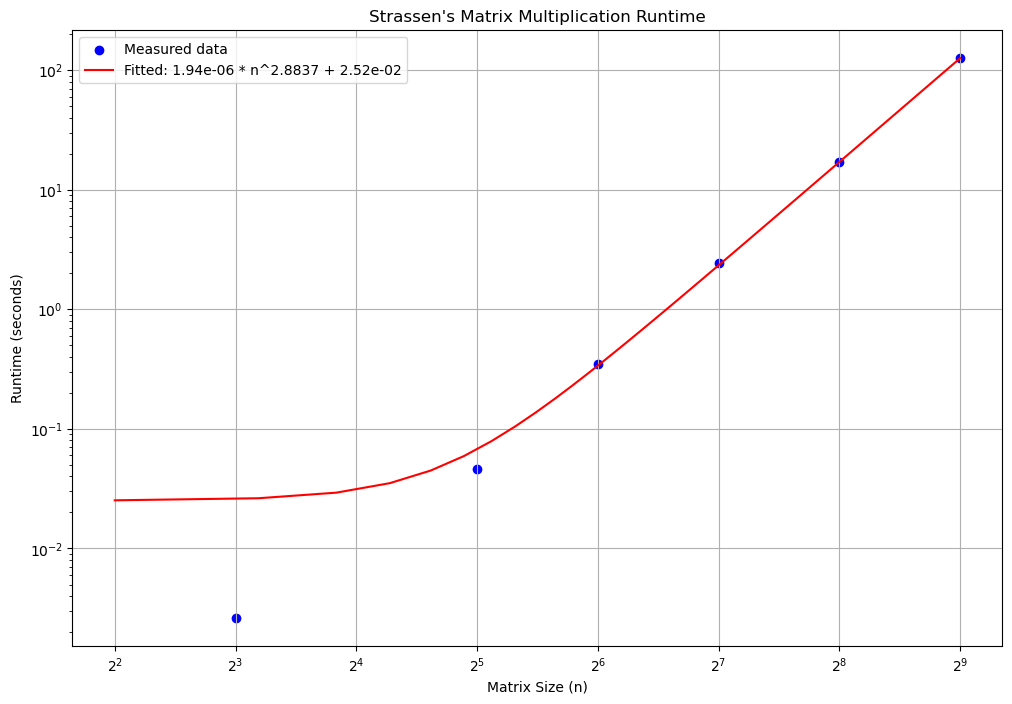

Fitted function: 1.935145e-06 * n^2.883726 + 2.517660e-02
Empirically determined exponent: 2.883726
Theoretical exponent (log2(7)): 2.807355
R-squared: 0.999999
RMSE: 0.047978
Key constant (coefficient a): 1.935145e-06


In [12]:
def strassen_matrix_multiply(A, B):
    """Perform matrix multiplication using Strassen's algorithm."""
    # Base case: if the matrices are 1x1, perform a simple multiplication
    n = A.shape[0]
    if n == 1:
        return A * B
    else:
        # Split the matrices into quarters, A11, A12, A21, A22, etc.
        # Find the midpoint of the matrix
        mid = n // 2
        # Get the quarters of the matrices for both A and B
        A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
        B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]
        
        # Calculate the 7 products of the Strassen algorithm, recursively
        M1 = strassen_matrix_multiply(A11 + A22, B11 + B22)
        M2 = strassen_matrix_multiply(A21 + A22, B11)
        M3 = strassen_matrix_multiply(A11, B12 - B22)
        M4 = strassen_matrix_multiply(A22, B21 - B11)
        M5 = strassen_matrix_multiply(A11 + A12, B22)
        M6 = strassen_matrix_multiply(A21 - A11, B11 + B12)
        M7 = strassen_matrix_multiply(A12 - A22, B21 + B22)
        
        # Calculate the resulting quarters of the C matrix
        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6
        
        # Combine the quarters into a single matrix
        C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
        return C

def measure_strassen_runtime(n):
    """Measure the runtime of Strassen matrix multiplication for n x n matrices."""
    # Generate random matrices
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    # Measure the runtime
    start_time = time.time()
    strassen_matrix_multiply(A, B)
    end_time = time.time()
    return end_time - start_time

def strassen_time_complexity(x, a, b, c):
    """Define the Strassen time complexity function with an empirically determined exponent."""
    return a * x**b + c

def run_strassen_test():
    """Test the performance of the Strassen matrix multiplication algorithm."""
    # Measure runtimes for different matrix sizes
    sizes = np.array([2**i for i in range(2, 10)])  # 4x4 to 512x512
    strassen_runtimes = [measure_strassen_runtime(n) for n in sizes]

    # Fit the time complexity function to the data
    popt, pcov = curve_fit(strassen_time_complexity, sizes, strassen_runtimes, p0=[1e-8, 2.8, 0])
    # Get the coefficients of the fitted function
    a, b, c = popt

    # Generate points for the fitted curve
    x_fit = np.linspace(sizes.min(), sizes.max(), 100)
    y_fit = strassen_time_complexity(x_fit, a, b, c)

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.scatter(sizes, strassen_runtimes, color='blue', label='Measured data')
    plt.plot(x_fit, y_fit, 'r-', label=f'Fitted: {a:.2e} * n^{b:.4f} + {c:.2e}')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.title("Strassen's Matrix Multiplication Runtime")
    plt.legend()
    plt.grid(True)
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.show()

    # Calculate R-squared value
    residuals = strassen_runtimes - strassen_time_complexity(sizes, a, b, c)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((strassen_runtimes - np.mean(strassen_runtimes))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean(residuals**2))

    return a, b, c, r_squared, rmse

# Run the Strassen matrix multiplication performance test
a, b, c, r_squared, rmse = run_strassen_test()
print(f"Fitted function: {a:.6e} * n^{b:.6f} + {c:.6e}")
print(f"Empirically determined exponent: {b:.6f}")
print(f"Theoretical exponent (log2(7)): {np.log2(7):.6f}")
print(f"R-squared: {r_squared:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"Key constant (coefficient a): {a:.6e}")

### Strassen's Matrix Multiplication: Runtime Analysis

Strassen's algorithm improves on the naive O(n³) matrix multiplication. This analysis discusses its asymptotic efficiency and estimates empirical time complexity based on experiments.

#### Theoretical Background

##### Faster than O(n³)


The standard matrix multiplication algorithm requires n³ multiplications for n×n matrices. Strassen's method, however, reduces this by using a clever recursive approach:

1. It divides each matrix into four n/2 × n/2 submatrices.
2. Instead of 8 recursive multiplications (as in the naive recursive approach), Strassen's method uses only 7 multiplications and 18 additions/subtractions.
3. This reduction in multiplications leads to the improved time complexity.

The recurrence relation for Strassen's algorithm is:
T(n) = 7T(n/2) + O(n²)

Applying the Master Theorem, we get:
T(n) = O(n^log₂7) ≈ O(n^2.8074)

This theoretical result shows why Strassen's method is asymptotically faster than O(n³).

#### Empirical Analysis

##### Estimating 'a' in O(n^a)
Experimental data fit the function:

```
Runtime = 1.935145e-06 * n^2.883726 + 2.517660e-02
```

The exponent 2.883726 is close to the theoretical log₂7 ≈ 2.807355.

Discrepancy (about 2.7% higher) may result from:
1. Overhead in implementation.
2. Matrix sizes tested (up to 512x512).

##### Key Constant
The constant 1.935145e-06 scales with implementation and hardware.

#### Discussion

1. **Theoretical vs. Empirical**: The empirical exponent (2.883726) is slightly higher than the theoretical (2.807355), indicating close but not perfect alignment with theoretical performance.

2. **Constant Term**: The constant term (2.517660e-02) represents fixed overheads.

3. **Limitations**: Analysis based on matrix sizes up to 512x512; larger matrices may show clearer asymptotic behavior.

Strassen's algorithm offers superior asymptotic performance over the naive O(n³) algorithm, with empirical evidence supporting its sub-cubic growth.

## 3. Memory Requirements Comparison <a name="memory"></a>


Size 4x4: Naive = 0.00 MiB, Strassen = 0.00 MiB
Size 8x8: Naive = 0.00 MiB, Strassen = 0.00 MiB
Size 16x16: Naive = 0.00 MiB, Strassen = 0.00 MiB
Size 32x32: Naive = 0.00 MiB, Strassen = 0.00 MiB
Size 64x64: Naive = 0.00 MiB, Strassen = 0.00 MiB
Size 128x128: Naive = 0.00 MiB, Strassen = 0.25 MiB
Size 256x256: Naive = 0.51 MiB, Strassen = 1.50 MiB
Size 512x512: Naive = 2.00 MiB, Strassen = 3.60 MiB


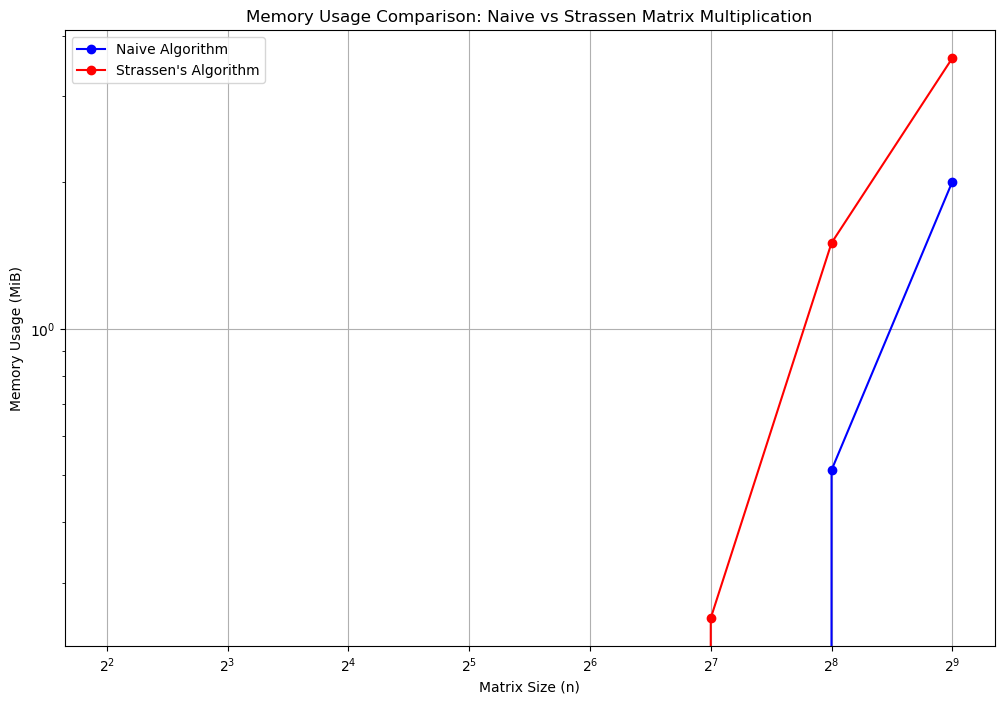


Naive algorithm memory complexity: O(n^2.13)
Strassen algorithm memory complexity: O(n^1.50)


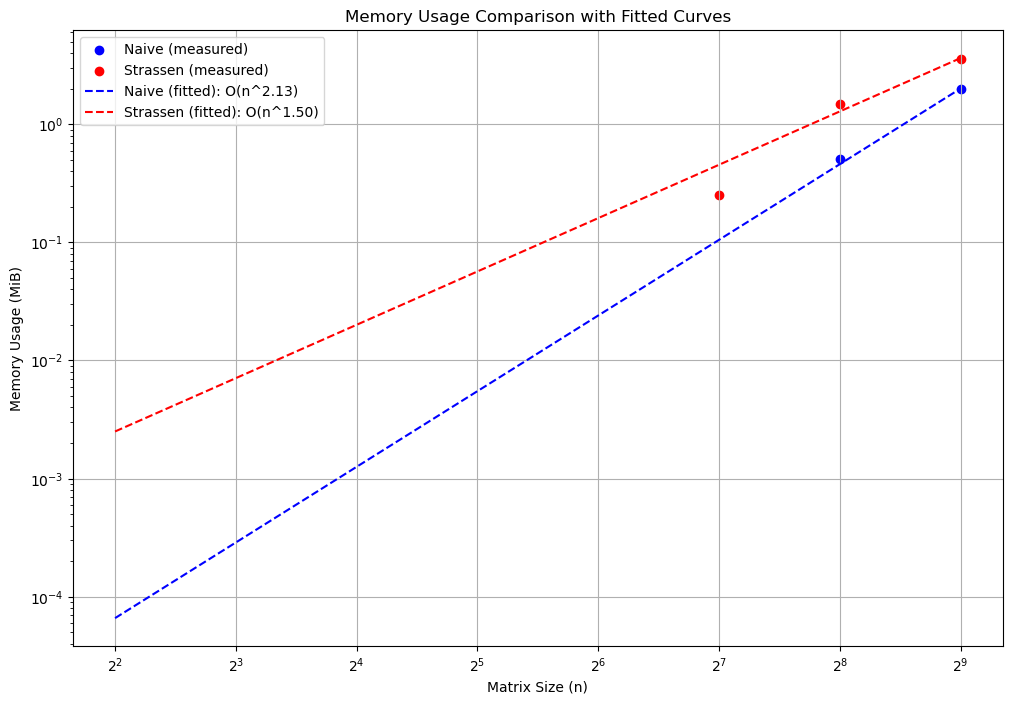

In [4]:
def naive_matrix_multiply(A, B):
    # We again define the naive matrix multiplication function
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

def strassen_matrix_multiply(A, B):
    # We define the Strassen matrix multiplication function
    n = A.shape[0]
    if n == 1:
        return A * B
    else:
        mid = n // 2
        A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
        B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]
        
        M1 = strassen_matrix_multiply(A11 + A22, B11 + B22)
        M2 = strassen_matrix_multiply(A21 + A22, B11)
        M3 = strassen_matrix_multiply(A11, B12 - B22)
        M4 = strassen_matrix_multiply(A22, B21 - B11)
        M5 = strassen_matrix_multiply(A11 + A12, B22)
        M6 = strassen_matrix_multiply(A21 - A11, B11 + B12)
        M7 = strassen_matrix_multiply(A12 - A22, B21 + B22)
        
        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6
        
        C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
        return C

def measure_memory_usage(func, n):
    '''
    Memory usage measurement function for a given function and input size.
    We use the memory_usage function from the memory_profiler package.
    '''
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    mem_usage = memory_usage((func, (A, B)))
    return max(mem_usage) - min(mem_usage)

def run_memory_comparison():
    '''
    We run the memory comparison for both algorithms. We consider matrix sizes of the 
    format 2**i given that the strassen algorithm requires this type of matrix size
    to work. We could pad the matrices, but for simplicity, we use as sizes powers of 2
    '''
    sizes = [2**i for i in range(2, 10)]  # 4x4 to 512x512
    naive_memory = []
    strassen_memory = []

    for n in sizes:
        naive_mem = measure_memory_usage(naive_matrix_multiply, n)
        strassen_mem = measure_memory_usage(strassen_matrix_multiply, n)
        naive_memory.append(naive_mem)
        strassen_memory.append(strassen_mem)
        print(f"Size {n}x{n}: Naive = {naive_mem:.2f} MiB, Strassen = {strassen_mem:.2f} MiB")

    plt.figure(figsize=(12, 8))
    plt.plot(sizes, naive_memory, 'bo-', label='Naive Algorithm')
    plt.plot(sizes, strassen_memory, 'ro-', label="Strassen's Algorithm")
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Memory Usage (MiB)')
    plt.title('Memory Usage Comparison: Naive vs Strassen Matrix Multiplication')
    plt.legend()
    plt.grid(True)
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.show()

    return sizes, naive_memory, strassen_memory

# Run the memory comparison
sizes, naive_memory, strassen_memory = run_memory_comparison()

# Fit power functions to the data
def power_func(x, a, b):
    return a * x**b

naive_popt, _ = curve_fit(power_func, sizes, naive_memory)
strassen_popt, _ = curve_fit(power_func, sizes, strassen_memory)

print(f"\nNaive algorithm memory complexity: O(n^{naive_popt[1]:.2f})")
print(f"Strassen algorithm memory complexity: O(n^{strassen_popt[1]:.2f})")

# Plot fitted curves
plt.figure(figsize=(12, 8))
plt.scatter(sizes, naive_memory, color='blue', label='Naive (measured)')
plt.scatter(sizes, strassen_memory, color='red', label='Strassen (measured)')
x_fit = np.linspace(min(sizes), max(sizes), 100)
plt.plot(x_fit, power_func(x_fit, *naive_popt), 'b--', label=f'Naive (fitted): O(n^{naive_popt[1]:.2f})')
plt.plot(x_fit, power_func(x_fit, *strassen_popt), 'r--', label=f'Strassen (fitted): O(n^{strassen_popt[1]:.2f})')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage Comparison with Fitted Curves')
plt.legend()
plt.grid(True)
plt.xscale('log', base=2)
plt.yscale('log')
plt.show()

#### Theoretical analysis

The naive matrix multiplication algorithm is straightforward. Given two $n \times n$ matrices $A$ and $B$, the algorithm computes the product $C = A \times B$ using the following steps:

1. Initialize an $n \times n$ result matrix $C$ with all elements set to zero.
2. For each element $c_{ij}$ in matrix $C$, calculate its value as:
   
   $$c_{ij} = \sum_{k=1}^n a_{ik} \cdot b_{kj}$$
   
   This involves iterating through each row $i$ of $A$ and each column $j$ of $B$, performing $n$ multiplications and additions for each element of $C$.

**Memory Requirements:**

1. **Input Matrices**: Two matrices, each with $n^2$ elements.
2. **Output Matrix**: One matrix with $n^2$ elements.
3. **Temporary Storage**: None needed.

**Total Memory Requirement**: $2n^2 + n^2 = 3n^2$


Strassen's algorithm improves the time complexity of matrix multiplication by reducing the number of multiplications required. Instead of the $O(n^3)$ operations in the naive method, Strassen's algorithm achieves $O(n^{\log_2 7}) \approx O(n^{2.81})$. The algorithm works as follows:

1. **Divide** the matrices $A$ and $B$ into four submatrices of size $\frac{n}{2} \times \frac{n}{2}$.
2. **Compute** seven products of these submatrices using a specific set of sum and difference operations.
3. **Combine** the results of these products to form the resulting matrix $C$.

The recursion depth is $\log_2 n$, and at each level, the algorithm requires additional space for the intermediate matrices.

**Memory Requirements:**

1. **Input Matrices**: Two matrices, each with $n^2$ elements.
2. **Output Matrix**: One matrix with $n^2$ elements.
3. **Intermediate Matrices**: Requires $17 \cdot \frac{n^2}{4} = \frac{17n^2}{4}$ additional space at each level of recursion.

Given the depth of recursion $\log_2 n$, the total memory requirement can be approximated by summing up the space across all levels:

**Total Memory Requirement**: $2n^2 + n^2 + \sum_{i=0}^{\log_2 n - 1} \frac{17n^2}{4^i} \approx 25.67n^2$

It is evident that the naive matrix multiplication algorithm is more efficient with memory usage compared to Strassen's algorithm. Despite Strassen's algorithm being faster in terms of time complexity, it requires significantly more memory due to the storage of intermediate matrices during the recursion process.


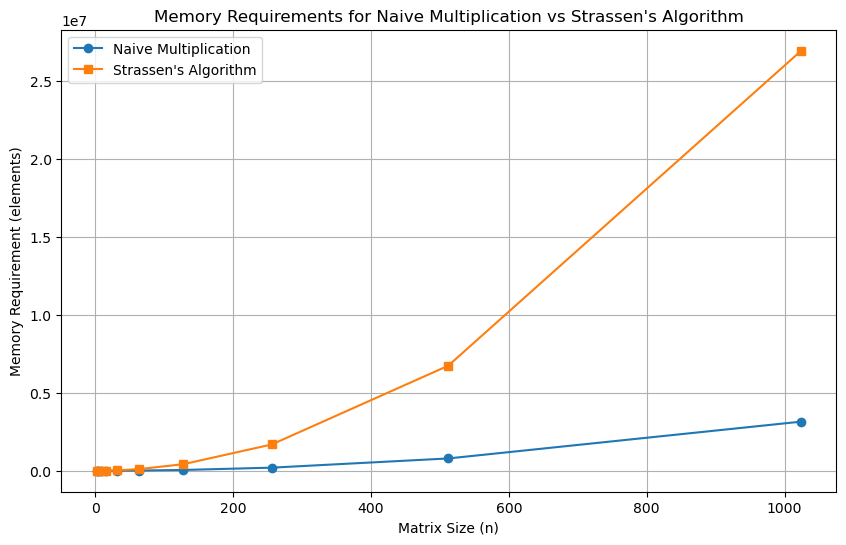

In [3]:
# Define matrix sizes
n_values = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

# Calculate memory requirements
naive_memory = 3 * n_values**2
strassen_memory = 25.67 * n_values**2

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, naive_memory, label='Naive Multiplication', marker='o')
plt.plot(n_values, strassen_memory, label="Strassen's Algorithm", marker='s')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Memory Requirement (elements)')
plt.title('Memory Requirements for Naive Multiplication vs Strassen\'s Algorithm')
plt.legend()
plt.grid(True)
plt.show()

## 4. Practical Usage Considerations <a name="usage"></a>


Testing for size 4x4
Testing for size 8x8
Testing for size 16x16
Testing for size 32x32
Testing for size 64x64
Testing for size 128x128
Testing for size 256x256
Testing for size 512x512


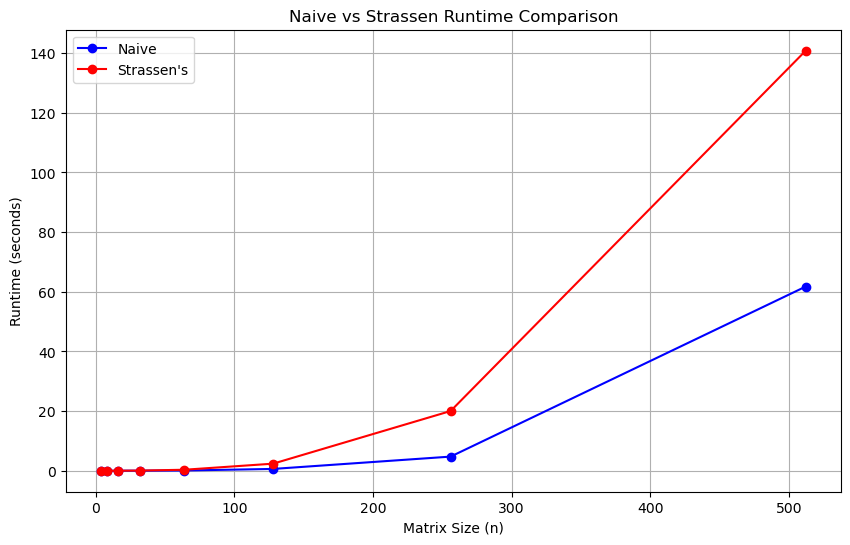

Strassen's algorithm did not outperform naive method in the tested range.


In [19]:
def compare_methods(sizes):
    naive_times = []
    strassen_times = []
    
    for n in sizes:
        print(f"Testing for size {n}x{n}")
        
        # Naive method
        naive_time = measure_naive_runtime(n)
        naive_times.append(naive_time)
        
        # Strassen's method
        strassen_time = measure_strassen_runtime(n)
        strassen_times.append(strassen_time)
    
    return naive_times, strassen_times

sizes = [4,8,16, 32, 64, 128, 256, 512]
naive_times, strassen_times = compare_methods(sizes)

plt.figure(figsize=(10, 6))
plt.plot(sizes, naive_times, 'bo-', label='Naive')
plt.plot(sizes, strassen_times, 'ro-', label="Strassen's")
plt.xlabel('Matrix Size (n)')
plt.ylabel('Runtime (seconds)')
plt.title('Naive vs Strassen Runtime Comparison')
plt.legend()
plt.grid(True)
plt.show()

crossover_point = next((i for i, (n, s) in enumerate(zip(naive_times, strassen_times)) if s < n), None)
if crossover_point is not None:
    print(f"Strassen's algorithm becomes faster at matrix size: {sizes[crossover_point]}x{sizes[crossover_point]}")
else:
    print("Strassen's algorithm did not outperform naive method in the tested range.")

When choosing between the naive method and Strassen's method for matrix multiplication, several factors come into play. These include the size of the matrices, available memory, precision requirements, hardware characteristics, implementation efficiency, and potential for parallelization. Understanding these factors is crucial for making an informed decision about which method to use in a given situation.

### The Case for the Naive Method

The naive method shines in scenarios involving small to medium-sized matrices. Based on the performance results, it outperforms Strassen's method for matrices up to 512x512. This makes it an excellent choice for many applications, such as graphics transformations in video games where matrices are typically 4x4 or smaller. Memory-constrained environments also favor the naive method. Its lower memory overhead makes it suitable for embedded systems or IoT devices with limited resources. The naive method's simplicity is also advantageous in educational settings or rapid prototyping, where development time and code simplicity are priorities.


Key advantages of the naive method include:
- Simpler implementation
- More cache-friendly for smaller matrices
- Better numerical stability
- Lower memory overhead

### When Strassen's Method Takes the Lead


Strassen's method is ideal for very large matrices (typically larger than 512x512) due to its better asymptotic time complexity (O(n^2.807) vs O(n^3)), making it suitable for large-scale scientific simulations or big data analytics. However, it requires significant memory resources and is best used on systems with ample RAM, such as high-performance computing clusters or powerful workstations. It is also effective in parallelizable environments, like cloud-based computations, where resources can be scaled elastically.

Advantages of Strassen's method:

- Better asymptotic time complexity: better performance for large matrices
- Suitability for parallel implementation

### Balancing Trade-offs

Choosing between these methods involves balancing trade-offs. Strassen's method has better asymptotic time complexity but uses significantly more memory, leading to more cache misses and potentially slower performance on systems with limited memory bandwidth. Implementation complexity is another factor. The naive method is easy to implement and optimize, making it popular among developers. Strassen's method requires a more complex implementation, increasing development time and the potential for bugs.

Numerical stability is critical in many applications. The naive method generally offers better numerical stability, while Strassen's method can introduce larger rounding errors due to its recursive nature, which may be problematic in high-precision applications. The crossover point, where Strassen's method becomes faster, is typically beyond matrix sizes of 512x512. However, the specific crossover point depends on the implementation and hardware.

For most practical applications dealing with matrices up to 512x512, the naive method is preferable due to its simplicity, lower memory requirements, and better real-world performance. Strassen's method is advantageous for very large matrices in environments with high computational resources but should be carefully considered against its increased implementation complexity and memory requirements.


## 5. MapReduce Implementation of Naive Method <a name="mapreduce"></a>


While we can't directly implement and run a MapReduce job in this notebook, we can outline the approach and discuss its implications:

1. **Map Phase**:
   - Input: (i, j, value) for each non-zero element in matrices A and B
   - For each element a[i,k] in A, emit ((i,j), (A,k,a[i,k])) for all j
   - For each element b[k,j] in B, emit ((i,j), (B,k,b[k,j])) for all i

2. **Reduce Phase**:
   - Input: ((i,j), list of (matrix, k, value))
   - For each (i,j), multiply corresponding elements from A and B and sum the results
   - Output: ((i,j), sum)

### Time Complexity Analysis

Using MapReduce doesn't change the fundamental time complexity of O(n^3) for the naive matrix multiplication algorithm:

1. **Map Phase**: O(n^2) operations to emit all possible combinations
2. **Shuffle and Sort**: O(n^3 log n) to distribute and sort all emitted key-value pairs
3. **Reduce Phase**: O(n) operations per output element, with n^2 output elements

The overall time complexity remains O(n^3), dominated by the shuffle and reduce phases.

### Factors Affecting the Key Constant

Several factors can affect the key constant in the runtime formula for a MapReduce implementation:

1. **Number of Mappers and Reducers**: More parallel processing can decrease the constant factor, but with diminishing returns.

2. **Network Bandwidth**: The shuffle phase involves significant data transfer, making network speed crucial.

3. **Data Locality**: Keeping data close to the processing nodes can significantly reduce communication overhead.

4. **Load Balancing**: Uneven distribution of work among nodes can lead to stragglers, increasing overall runtime.

5. **Hardware Specifications**: CPU speed, memory bandwidth, and storage type (HDD vs. SSD) of individual nodes affect processing speed.

6. **Input Data Characteristics**: Sparsity of the matrices can greatly affect performance, as it changes the amount of data processed and transferred.

While MapReduce doesn't improve the asymptotic time complexity, it allows for distributed processing of large matrices that wouldn't fit in the memory of a single machine, trading off increased constant factors for the ability to scale to much larger problem sizes.

## Conclusion


This notebook explored the time complexity, memory usage, and practical considerations of naive matrix multiplication and Strassen's algorithm. We've seen that while Strassen's algorithm has better asymptotic performance, the naive method can be preferable in many practical situations due to its simplicity, lower memory requirements, and better performance for smaller matrices.

We've also discussed how MapReduce can be used to implement matrix multiplication for very large matrices, allowing for distributed processing at the cost of increased constant factors in the runtime.